### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
female_data=pd.read_csv('female_complete.csv')

In [3]:
female_data['Medal'] = female_data['Medal'].fillna('NA')

In [4]:
male_data=pd.read_csv('male_gdp.csv')
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [5]:
female_swim = female_data[female_data['Sport'] == 'Basketball']

In [6]:
female_swim['Sport'].describe

<bound method NDFrame.describe of 3859    Basketball
3860    Basketball
3861    Basketball
3862    Basketball
3863    Basketball
           ...    
4565    Basketball
4566    Basketball
4567    Basketball
4568    Basketball
4569    Basketball
Name: Sport, Length: 711, dtype: object>

In [7]:
female_swim['Medal'].describe

<bound method NDFrame.describe of 3859        NA
3860        NA
3861    Bronze
3862        NA
3863        NA
         ...  
4565        NA
4566        NA
4567        NA
4568        NA
4569        NA
Name: Medal, Length: 711, dtype: object>

In [8]:
female_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 3859 to 4569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      711 non-null    int64  
 1   Unnamed: 0_x    711 non-null    int64  
 2   ID              711 non-null    int64  
 3   Name            711 non-null    object 
 4   Sex             711 non-null    object 
 5   Age             711 non-null    float64
 6   Height          711 non-null    float64
 7   Weight          711 non-null    float64
 8   NOC             711 non-null    object 
 9   Games           711 non-null    object 
 10  Year            711 non-null    int64  
 11  Season          711 non-null    object 
 12  City            711 non-null    object 
 13  Sport           711 non-null    object 
 14  Event           711 non-null    object 
 15  Medal           711 non-null    object 
 16  Team            711 non-null    object 
 17  Unnamed: 0_y    711 non-null   

In [9]:
# Extract Response and Predictors
y = pd.DataFrame(female_swim["Medal"]).astype('category')
X = pd.DataFrame(female_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [10]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (533, 1) (533, 6)
Test Set  : (178, 1) (178, 6)


In [11]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [12]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
4461,27.0,68.0000,178.0,2.410000e+11,10955141.0,21998.804032,NA
4497,22.0,64.0000,165.0,1.190000e+11,10197101.0,11669.983459,NA
4043,24.0,70.0000,188.0,5.262328e+10,3857700.0,13641.102718,NA
3897,20.0,77.3125,178.0,9.750823e+09,14138216.0,689.678423,NA
4341,26.0,64.0000,170.0,4.679605e+09,9884052.0,473.450034,NA
...,...,...,...,...,...,...,...
4242,20.0,85.0000,202.0,1.660000e+12,142742350.0,11629.344760,Bronze
4429,27.0,82.0000,192.0,2.410000e+11,10955141.0,21998.804032,NA
4173,23.0,81.0000,183.0,1.040000e+11,4087500.0,25443.425076,NA
4151,27.0,78.0000,172.0,1.150000e+11,25096150.0,4582.376181,NA


In [13]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        532
Bronze     60
Silver     60
Gold       59
Name: Medal, dtype: int64


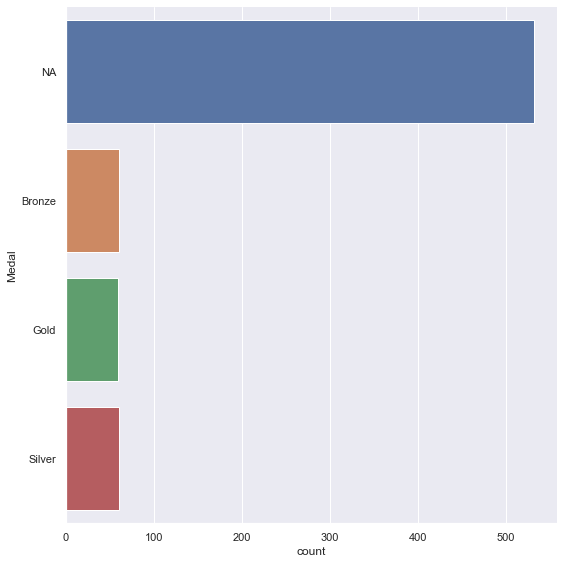

In [14]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(female_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(female_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = female_swim, kind = "count", height = 8)

In [15]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(533, 6) (533, 1)


In [16]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(1600, 6) (1600, 1)


In [17]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,27.000000,68.000000,178.000000,2.410000e+11,10955141.0,21998.804032,NA
1,22.000000,64.000000,165.000000,1.190000e+11,10197101.0,11669.983459,NA
2,24.000000,70.000000,188.000000,5.262328e+10,3857700.0,13641.102718,NA
3,20.000000,77.312500,178.000000,9.750823e+09,14138216.0,689.678423,NA
4,26.000000,64.000000,170.000000,4.679605e+09,9884052.0,473.450034,NA
...,...,...,...,...,...,...,...
1595,23.117850,82.410750,190.000000,1.060000e+12,21249200.0,49884.230936,Silver
1596,25.183717,97.061593,189.183717,2.680000e+12,65659790.0,40816.457074,Silver
1597,33.963236,66.147054,176.911757,6.130000e+11,20127400.0,30455.995310,Silver
1598,27.696448,68.875139,180.607103,2.680000e+12,65659790.0,40816.457074,Silver


In [18]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
3934,28.0,87.0,195.0,2.070000e+11,10510785.0,19694.057104
3936,29.0,80.0,189.0,2.660000e+12,63700300.0,41758.045096
3950,24.0,74.0,185.0,1.230000e+13,292805298.0,42007.436628
4446,35.0,60.0,170.0,2.600000e+11,146596557.0,1773.575078
4407,27.0,82.0,193.0,5.648530e+10,4267558.0,13235.977570
...,...,...,...,...,...,...
4515,23.0,85.0,198.0,2.210000e+12,143201676.0,15432.780270
4106,27.0,70.0,182.0,4.150000e+11,19153000.0,21667.623871
3989,29.0,72.0,184.0,1.040000e+11,4087500.0,25443.425076
4281,27.0,65.0,180.0,2.470000e+12,66896109.0,36922.924770


Number of Medal Types : 4
Bronze    400
Gold      400
NA        400
Silver    400
Name: Medal, dtype: int64


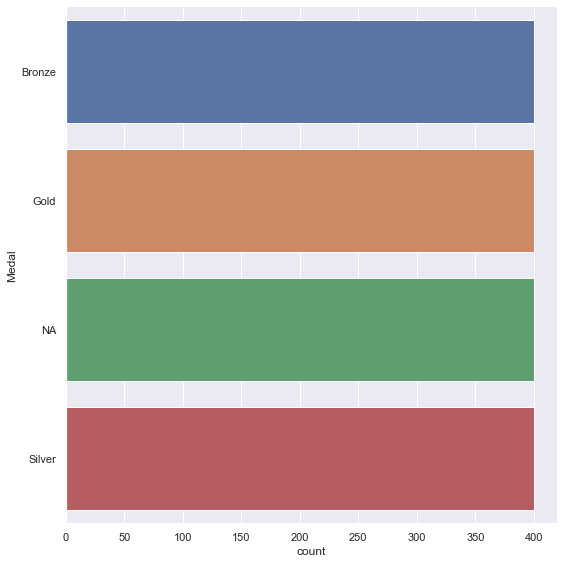

In [19]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (1200, 1) (1200, 6)
Test Set  : (400, 1) (400, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9983333333333333

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.985



<AxesSubplot:>

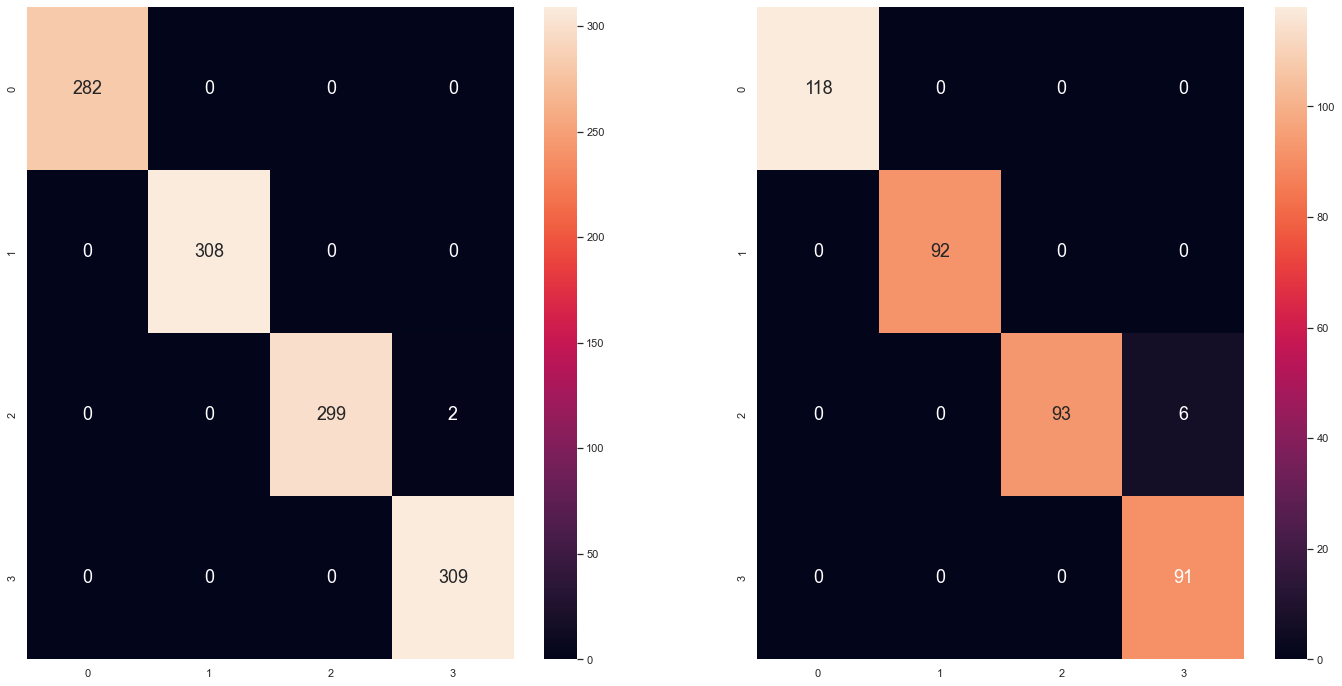

In [20]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 8)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

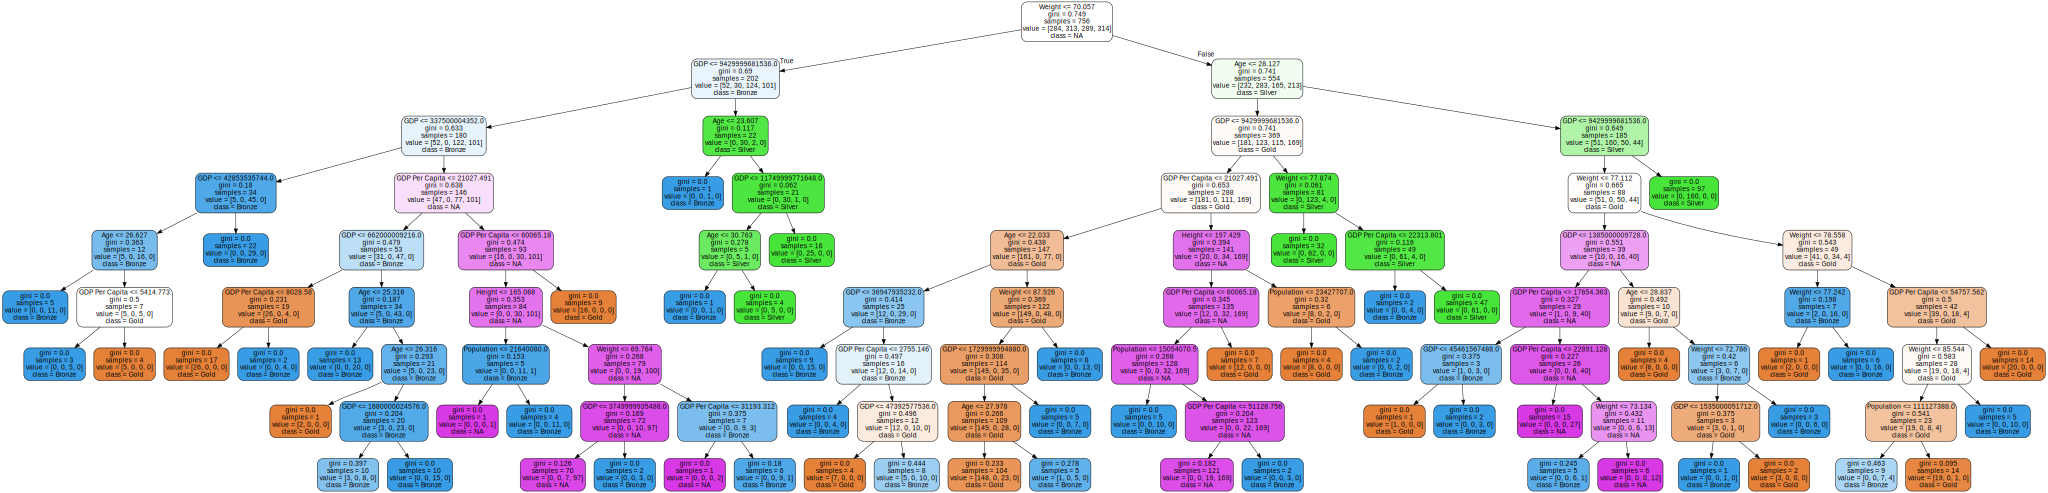

In [21]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [22]:
graph.render("Tree_female_swim")

'Tree_female_swim.pdf'

### Predictions

In [23]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.9831460674157303


<AxesSubplot:>

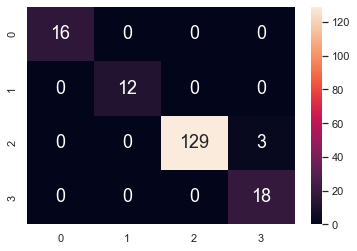

In [24]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})